<center><img src="images/header.png"></center>

<h1><center>Алгоритмы интеллектуальной обработки больших объемов данных</center></h1>
<hr>
<h2><center>Деревья решений, случайные леса (практика)</center></h2>

**Срок сдачи:** 3 апреля 2017, 06:00 <br> 
**Штраф за опоздание:** -2 балла после 06:00 3 апреля, -4 балла после 06:00 10 апреля, -6 баллов после 06:00 17 апреля

При отправлении ДЗ указывайте фамилию в названии файла<br>

Не забудте создать задание в Slack через /todo.

Используйте данный Ipython Notebook при оформлении домашнего задания.

In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

# Практика

### Качество вина (10 баллов)

Давайте все-таки разберемся с [вином](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)!


#### Задание (1 балл)
* Загрузите данные, выполните преобразование целевой переменной: 
    * quality > 5 -> 1
    * quality <= 5 -> 0
* Разделите выборку на обучающую и контрольную в пропорции 80/20

In [259]:
# Your Code Here
df_wine = pd.read_csv ("winequality-red.csv", sep=';')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [260]:
def prepocess_wine(df):
    df.loc[:, 'quality_cat'] = (df.loc[:, 'quality'] > 5).astype(int)
    df = df.drop('quality', axis=1)
    
    return df

In [261]:
df_wine = df_wine.pipe(prepocess_wine)
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_cat
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


## Разделим выборку на обучающую и контрольную

In [262]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_wine, test_size=0.2)
print train.shape, test.shape

(1279, 12) (320, 12)


#### Задание (2 балла)

Сфокусируемся на одном гиперпараметре деревьев решений - максимальной глубине.

Подберите наилучшую глубину `d` дерева с помошью 
* Усредненной оценки качества roc-auc на кросс-валидации при различных `d`
* Валидационных кривых

In [263]:
from sklearn.tree import DecisionTreeClassifier

try:
    from sklearn.model_selection import cross_val_score
except ImportError:
    from sklearn.cross_validation import cross_val_score

try:
    from sklearn.model_selection import validation_curve
except ImportError:
    from sklearn.learning_curve import validation_curve
    
from sklearn.metrics import roc_auc_score

## Cross val score

In [265]:
# Your Code Here
min_val = 10000.
d_ans = 0

plot_data = []

for d in range(1, 15):
    dt = DecisionTreeClassifier (max_depth=d, random_state=123)
    cur_norm = np.linalg.norm (cross_val_score(dt, df_wine.drop ('quality_cat', axis=1), df_wine['quality_cat'], scoring='roc_auc', cv=10))
    if min_val > cur_norm:
        d_ans = d
        min_val = cur_norm
    plot_data.append (cur_norm)

print min_val, d_ans

1.97360834505 14


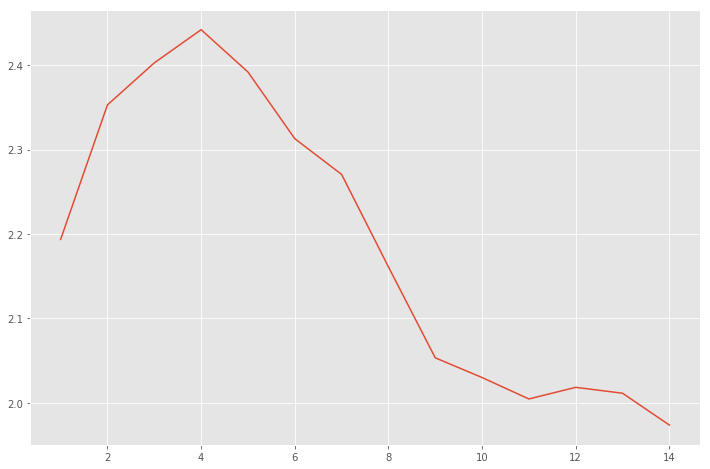

In [266]:
plt.plot (range (1, 15), plot_data)

In [267]:
cl = DecisionTreeClassifier ()
train_scores, test_scores = validation_curve (cl, df_wine.drop('quality_cat', axis=1), df_wine['quality_cat'], 'max_depth', range(1,20), scoring='roc_auc')

In [268]:
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std (axis=1)
train_mean = train_scores.mean (axis=1)
train_std = train_scores.std (axis=1)

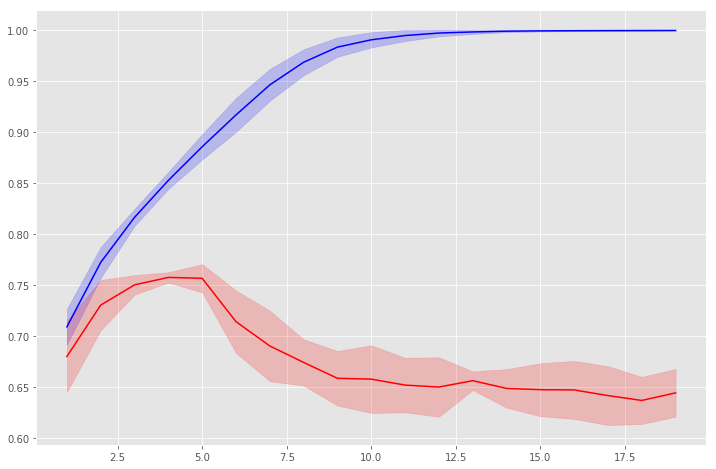

In [269]:
d = range (1, 20)
plt.plot (d, train_mean, color='b')
plt.plot (d, test_mean, color='r')

plt.fill_between (d, train_mean - train_std, train_mean + train_std, color='b', alpha=0.2)
plt.fill_between (d, test_mean - test_std, test_mean + test_std, color='r', alpha=0.2)

#### Задание (1 балл)

Отсортируйте признаки по важности. Вектор с важностью признаков можно получить с помощью `model.feature_importances_`

In [270]:
# Your Code Here
classifier = DecisionTreeClassifier (max_depth=4, random_state=1234)
classifier.fit (train.drop('quality_cat', axis=1), train['quality_cat'].values)
headers_list = []
for idx, element in enumerate (list (df_wine.drop ('quality_cat', axis=1))):
    headers_list.append ((element, classifier.feature_importances_[idx]))
headers_list.sort (key=lambda x : x[1])
# generate output list
output_list = []
for element in headers_list:
    output_list.append (element[0])
df_wine_sorted = df_wine.reindex (columns=output_list)
df_wine_sorted.head ()

,fixed acidity,citric acid,residual sugar,free sulfur dioxide,density,pH,chlorides,total sulfur dioxide,sulphates,volatile acidity,alcohol
0,7.4,0.00,1.9,11.0,0.9978,3.51,0.076,34.0,0.56,0.70,9.4
1,7.8,0.00,2.6,25.0,0.9968,3.20,0.098,67.0,0.68,0.88,9.8
2,7.8,0.04,2.3,15.0,0.9970,3.26,0.092,54.0,0.65,0.76,9.8
3,11.2,0.56,1.9,17.0,0.9980,3.16,0.075,60.0,0.58,0.28,9.8
4,7.4,0.00,1.9,11.0,0.9978,3.51,0.076,34.0,0.56,0.70,9.4


#### Задание (2 балла)
* Получите предсказания на тестовой выборке
* Постройте ROC кривые для обучающей и тестовой выборок
* Посчитайте остальные меры качества классификации при пороге в `0.5`

In [271]:
from sklearn import metrics

F1 score:  0.717325227964
Jaccard similarity score: 0.709375
Precision score: 0.670454545455


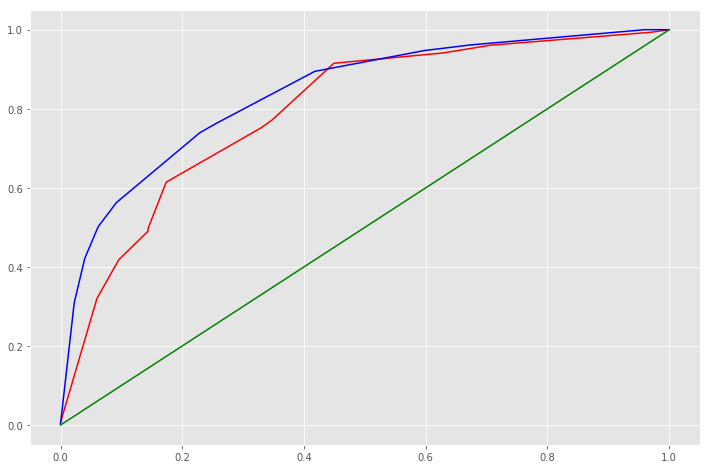

In [272]:
# Your Code Here
pred_on_test = classifier.predict (test.drop ('quality_cat', axis=1))
pred_on_train = classifier.predict (train.drop ('quality_cat', axis=1))

fpr_test, tpr_test, thresholds_test = metrics.roc_curve(test.quality_cat, pred_on_test)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(train.quality_cat, pred_on_train)

proba_test = classifier.predict_proba (test.drop ('quality_cat', axis=1))
proba_train = classifier.predict_proba (train.drop ('quality_cat', axis=1))

proba_pred_test = [y for (x, y) in proba_test]
proba_pred_train = [y for (x, y) in proba_train]
fpr_proba_test, tpr_proba_test, thresholds_proba_test = metrics.roc_curve(test.quality_cat, proba_pred_test)
fpr_proba_train, tpr_proba_train, thresholds_proba_train = metrics.roc_curve(train.quality_cat, proba_pred_train)

plt.plot (fpr_proba_test, tpr_proba_test, c='red')
plt.plot (fpr_proba_train, tpr_proba_train, c='blue')
plt.plot ([0, 1], [0, 1], c='green')

#scores
print "F1 score: ", metrics.f1_score (test.quality_cat, pred_on_test)
print "Jaccard similarity score:", metrics.jaccard_similarity_score (test.quality_cat, pred_on_test)
print "Precision score:", metrics.precision_score (test.quality_cat, pred_on_test)

#### Задание (1 балл)
Перейдем к модели случайного леса. Зафиксируем некоторую глубину дерева (можно взять оптимальное с предыдущих заданий).

Сравните качество работы 
* Простого дерева решений
* Бэггинга над 10,20,...,100 деревьями решений
* Случайного леса с 10,20,...,100 деревьями решений

Получите график, у которого по оси X откладывается количество деревьев, а по оси Y - качество классификации.

In [273]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

10
20
30
40
50
60
70
80
90
100


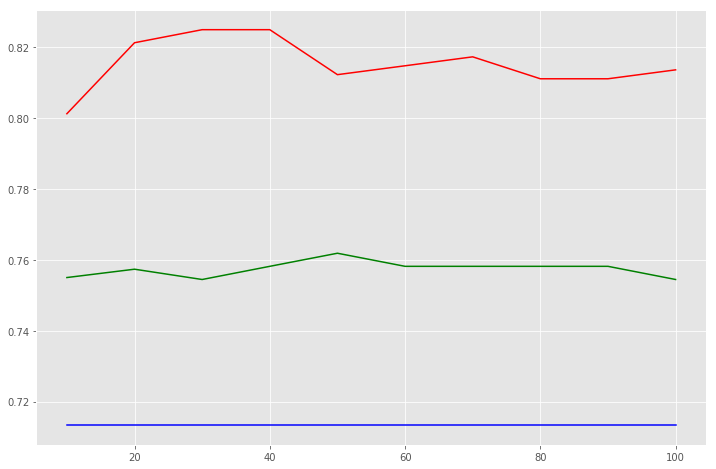

In [274]:
# Your Code Here
bagging_scores = []
rf_scores = []

dt_cl = DecisionTreeClassifier (max_depth=4, random_state=24)
dt_cl.fit (train.drop ('quality_cat', axis=1), train.quality_cat)
dt_pred_test = dt_cl.predict (test.drop ('quality_cat', axis=1))
dt_scores = (metrics.f1_score (test.quality_cat, dt_pred_test))

for trees in range (10, 101, 10):
    print trees    
    bagging_cl = BaggingClassifier (dt_cl, n_estimators=trees, random_state=123)
    bagging_cl.fit (train.drop ('quality_cat', axis=1), train.quality_cat)
    bagging_pred_test = bagging_cl.predict (test.drop ('quality_cat', axis=1))
    bagging_scores.append (metrics.f1_score (test.quality_cat, bagging_pred_test))
    
    rf_cl = RandomForestClassifier (n_estimators=trees, random_state=123)
    rf_cl.fit (train.drop ('quality_cat', axis=1), train.quality_cat)
    rf_pred_test = rf_cl.predict (test.drop ('quality_cat', axis=1))
    rf_scores.append (metrics.f1_score (test.quality_cat, rf_pred_test))
    
plt.plot (range (10, 101, 10), [dt_scores] * 10, color='b')
plt.plot (range (10, 101, 10), bagging_scores, color='g')
plt.plot (range (10, 101, 10), rf_scores, color='r')

####  Задание (3 балла)
* С помощью `GridSearchCV` или `RandomSearchCV` подберите наиболее оптимальные параметры для случайного леса.
* Для этих параметров сравните средние результаты по кросс-валидации и качество на контрольной выборке

In [275]:
from sklearn.model_selection import GridSearchCV

In [318]:
# Your Code Here
forest_cl = RandomForestClassifier ()
parameters = {'n_estimators':range (1,50), 'min_samples_leaf':range (1, 10)}
grid_search = GridSearchCV (forest_cl, parameters)
grid_search.fit (train.drop ('quality_cat', axis=1), train.quality_cat)
print grid_search.best_params_

{'n_estimators': 34, 'min_samples_leaf': 2}


### Считалось достаточно долго :(

## Cross validation

In [315]:
default_tree = RandomForestClassifier ()
default_tree.fit (train.drop ('quality_cat', axis=1), train.quality_cat)
default_pred = default_tree.predict (test.drop ('quality_cat', axis=1))

In [319]:
best_rfc = RandomForestClassifier(n_estimators=34, min_samples_leaf=2)
print "Tree with best parameters:", np.linalg.norm (cross_val_score(best_rfc, df_wine.drop ('quality_cat', axis=1), df_wine['quality_cat'], scoring='roc_auc', cv=10))
print "Default tree:", np.linalg.norm (cross_val_score(default_tree, df_wine.drop ('quality_cat', axis=1), df_wine['quality_cat'], scoring='roc_auc', cv=10))

Tree with best parameters: 2.5169812872
Default tree: 2.44242871342


## F1 score

In [320]:
best_predicted = grid_search.predict (test.drop ('quality_cat', axis=1))
print "Tree with best parameters:", metrics.f1_score (test.quality_cat, best_predicted)
print "Default tree:", metrics.f1_score (test.quality_cat, default_pred)

Tree with best parameters: 0.808510638298
Default tree: 0.782051282051
